In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy.core as ow 
import numpy as np
import  urllib
from config import api_key
from datetime import datetime

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
cities_list = []

for x in range(0,len(lats)):
    city = citipy.nearest_city(lats[x], lngs[x])
    if city.city_name not in cities_list:
        cities_list.append(city.city_name)

In [4]:
settings = {"units": "imperial", "appid": api_key}

weather_data = []
cities_valid = []
print("Begining Data Retrieval")
print("=======================")
for key,city in enumerate(cities_list):
    try:
        print(f'Processing Record {key} | {city}')
        cities_valid.append(city)
        weather_data.append(ow.get_current(city, **settings))
        if (len(cities_valid) == 500):
           break
    except urllib.error.HTTPError as e:
        print("Weather for City " + city + " Not Found")
        cities_valid.remove(city)
        continue
print("=======================")
print("Data Retrieval Complete")
print("=======================")

Begining Data Retrieval
Processing Record 0 | gornopravdinsk
Processing Record 1 | urdzhar
Weather for City urdzhar Not Found
Processing Record 2 | tura
Processing Record 3 | rikitea
Processing Record 4 | iqaluit
Processing Record 5 | rio cuarto
Processing Record 6 | sampit
Processing Record 7 | punta arenas
Processing Record 8 | urubicha
Processing Record 9 | vaini
Processing Record 10 | quatre cocos
Processing Record 11 | qaanaaq
Processing Record 12 | tabiauea
Weather for City tabiauea Not Found
Processing Record 13 | khasan
Weather for City khasan Not Found
Processing Record 14 | hermanus
Processing Record 15 | ghaziabad
Processing Record 16 | hamilton
Processing Record 17 | bluff
Processing Record 18 | monrovia
Processing Record 19 | airai
Processing Record 20 | saskylakh
Processing Record 21 | bengkulu
Processing Record 22 | jamestown
Processing Record 23 | hailar
Processing Record 24 | moose jaw
Processing Record 25 | atuona
Processing Record 26 | evensk
Processing Record 27 | s

Processing Record 226 | nizhneyansk
Processing Record 227 | asuncion
Processing Record 228 | banff
Processing Record 229 | samarinda
Processing Record 230 | buqayq
Weather for City buqayq Not Found
Processing Record 231 | morondava
Processing Record 232 | yerofey pavlovich
Processing Record 233 | tarija
Processing Record 234 | manokwari
Processing Record 235 | vila franca do campo
Processing Record 236 | rapid valley
Processing Record 237 | bolungarvik
Weather for City bolungarvik Not Found
Processing Record 238 | naze
Processing Record 239 | amderma
Weather for City amderma Not Found
Processing Record 240 | iranshahr
Processing Record 241 | adwa
Weather for City adwa Not Found
Processing Record 242 | nalut
Processing Record 243 | westport
Processing Record 244 | mahebourg
Processing Record 245 | mys shmidta
Processing Record 246 | alot
Processing Record 247 | voznesenye
Processing Record 248 | shimoda
Processing Record 249 | vitim
Processing Record 250 | lebanon
Processing Record 251 

Processing Record 454 | ponta delgada
Processing Record 455 | meadow lake
Processing Record 456 | padang
Processing Record 457 | kamyshlov
Processing Record 458 | ishigaki
Processing Record 459 | atambua
Processing Record 460 | ingham
Processing Record 461 | bolkhov
Processing Record 462 | magadan
Processing Record 463 | vaitape
Processing Record 464 | boende
Processing Record 465 | dumai
Processing Record 466 | serafimovich
Processing Record 467 | marcona
Weather for City marcona Not Found
Processing Record 468 | shenjiamen
Processing Record 469 | xuddur
Processing Record 470 | faanui
Processing Record 471 | weihai
Processing Record 472 | hailey
Processing Record 473 | nikel
Processing Record 474 | solnechnyy
Processing Record 475 | lorengau
Processing Record 476 | kuytun
Processing Record 477 | dogondoutchi
Processing Record 478 | hibbing
Processing Record 479 | mosjoen
Processing Record 480 | gwembe
Processing Record 481 | victor harbor
Processing Record 482 | berlevag
Processing Re

In [5]:

summary = ["clouds.all", "sys.country", "dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
    # Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]


In [6]:
column_names = ["Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

df_weather_data = pd.DataFrame(data, index=cities_valid, columns=column_names)
df_weather_data.count()

Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

In [7]:
df_weather_data.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
gornopravdinsk,64,RU,1510976680,87,60.05,69.90,20.32,3.04
tura,0,IN,1510976680,83,25.52,90.22,74.00,3.27
rikitea,64,PF,1510976681,100,-23.12,-134.97,72.79,22.73
iqaluit,5,CA,1510974000,59,63.75,-68.51,-0.41,4.70
rio cuarto,0,AR,1510974000,28,-33.13,-64.35,59.00,5.82


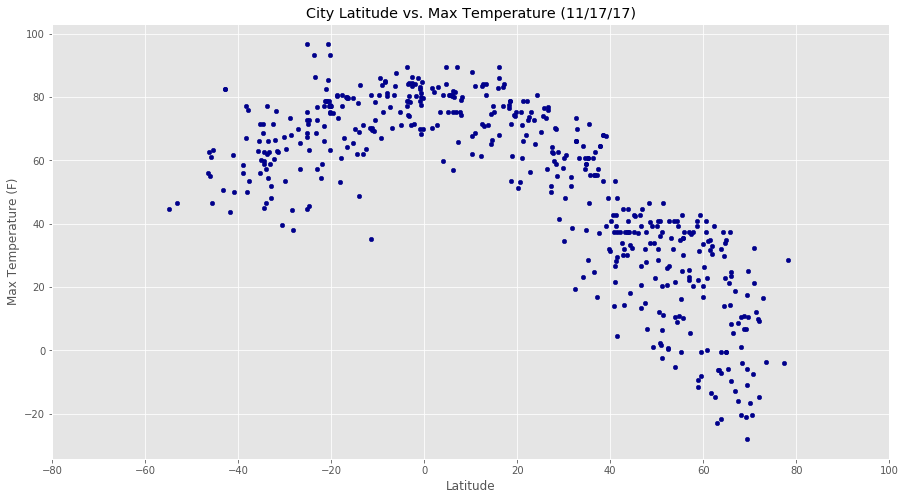

In [14]:
dt_display = datetime.today().strftime("%m/%d/%y")
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Max Temp",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Max Temperature (" + dt_display  + ")")
plt.show()

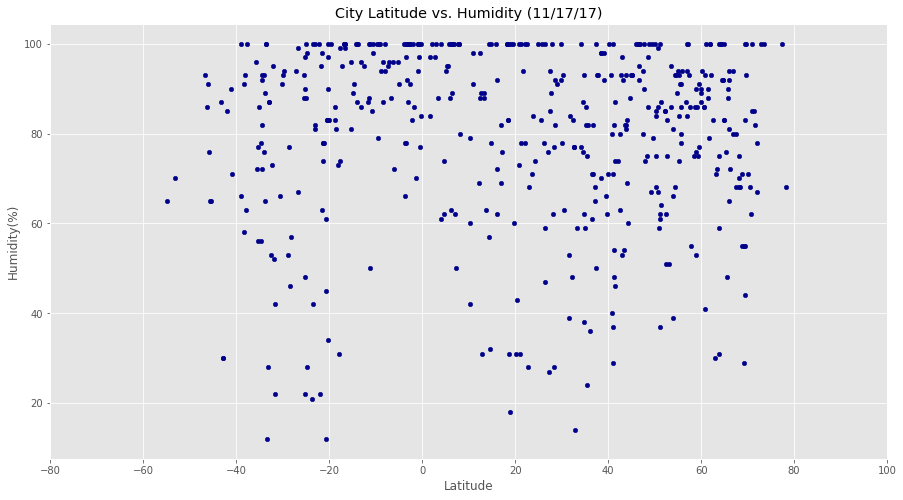

In [16]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Humidity",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Humidity (" + dt_display + ")")
plt.show()

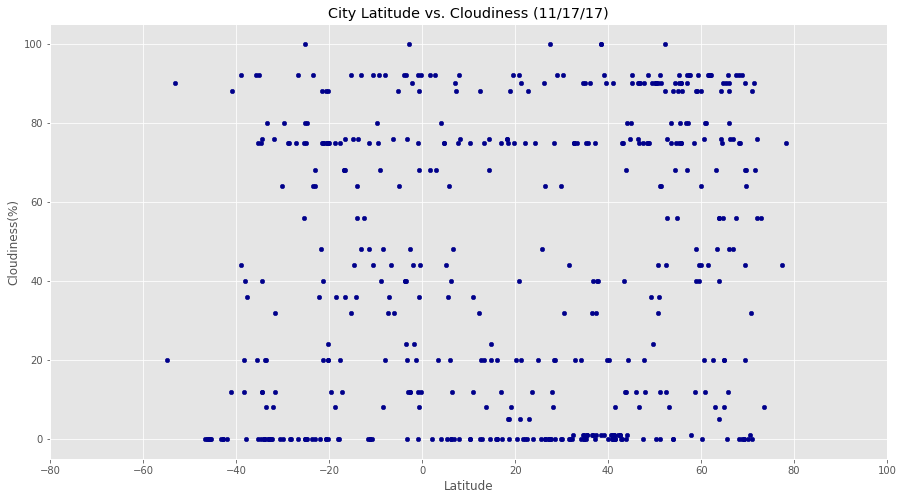

In [17]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Cloudiness",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Cloudiness (" + dt_display + ")")
plt.show()

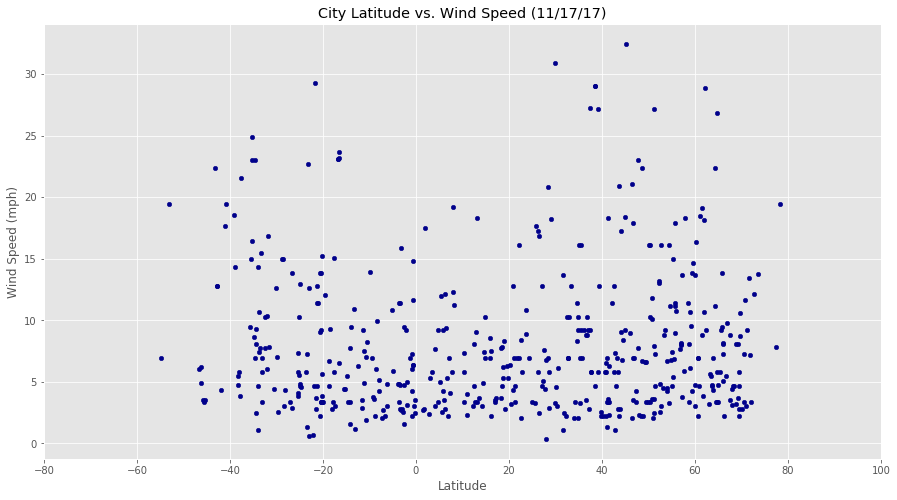

In [18]:
df_weather_data.plot(kind="scatter",x="Lat",y="Wind Speed",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Wind Speed (" + dt_display + ")")
plt.show()